In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 

In [2]:
df = pd.read_csv("../datasets/pizza_delivery.csv")

In [3]:
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


<Axes: >

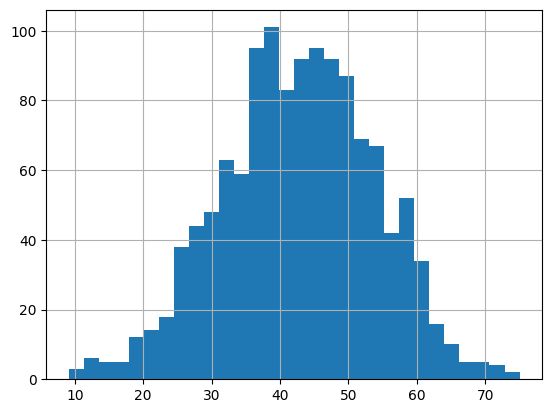

In [4]:
df["bill"].hist(bins=30)

<Axes: ylabel='Density'>

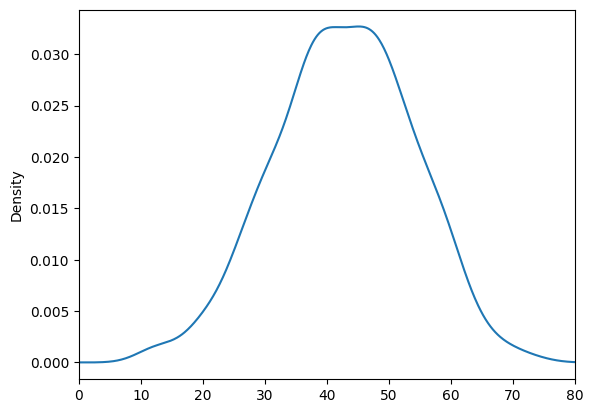

In [5]:
df["bill"].plot(kind='kde', xlim=(0,80))


In [6]:
(df["bill"].min(), df["bill"].max())

(9.1, 75.0)

In [7]:
std_1 = (df.bill.mean()-df.bill.std(), df.bill.mean()+df.bill.std()) 
std_1

(31.53300646297403, 53.978841878258194)

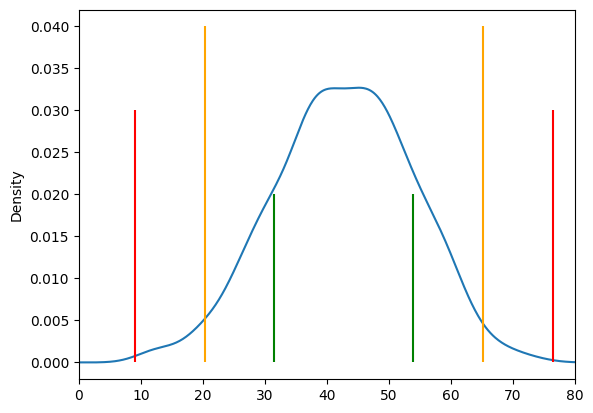

In [8]:
axes = df["bill"].plot(kind='kde', xlim=(0,80))
pdf= norm.pdf(df.bill, scale=11.22, loc=42.7)

std_1 = (df.bill.mean()-df.bill.std(), df.bill.mean()+df.bill.std())
std_2 = (df.bill.mean()-2*df.bill.std(), df.bill.mean()+2*df.bill.std())
std_3 = (df.bill.mean()-3*df.bill.std(), df.bill.mean()+3*df.bill.std())

# axes.scatter(df.bill, pdf)

axes.vlines(std_1, 0, .02, color='green')
axes.vlines(std_2, 0, .04, color='orange')
axes.vlines(std_3, 0, .03, color='red')

plt.show()

**point on normal curve**

In [9]:
pdf= norm.pdf(df.bill, scale=11.22, loc=42.7)
pdf

array([0.01335802, 0.01237723, 0.01386231, ..., 0.03430781, 0.03367465,
       0.03555635])

In [10]:
df.bill.std()

11.222917707642083

In [11]:
pdf_points =  pd.DataFrame({"Point": df.bill, "Density Point": pdf}).sort_values("Point")
pdf_points

,Point,Density Point
770,9.1,0.000401
258,10.6,0.000594
72,10.8,0.000625
535,11.6,0.000763
520,11.9,0.000821
...,...,...
1257,71.3,0.001380
803,71.7,0.001260
385,71.9,0.001203
422,74.0,0.000726


In [12]:
pdf_points[(pdf_points["Point"]>30) & (pdf_points["Point"]<32)]

,Point,Density Point
150,30.1,0.018926
426,30.1,0.018926
260,30.2,0.019116
1054,30.3,0.019306
612,30.3,0.019306
450,30.4,0.019496
625,30.4,0.019496
898,30.4,0.019496
191,30.4,0.019496
953,30.4,0.019496


____

## Standard Normal Distribution

In Tina's section the mean was 64 and her score was 74. In Jack's section the
was 72 and his score was 82. Both Tina and Jack pleased that their scores were
each 10 points above the average of each respective section.

In [14]:
tina_section = {
    'mean': 64,
    'score':74,
    'std': 5
}

jack_section = {
    'mean': 72,
    'score':82,
    'std': 10
}


In [38]:
tina_section_scores= np.random.normal(tina_section["mean"], tina_section["std"], 3000)
jack_section_scores = np.random.normal(jack_section["mean"], jack_section['std'], 3000)

In [39]:
sections = pd.DataFrame({
    "tina_section": tina_section_scores,
    "jack_section": jack_section_scores
})

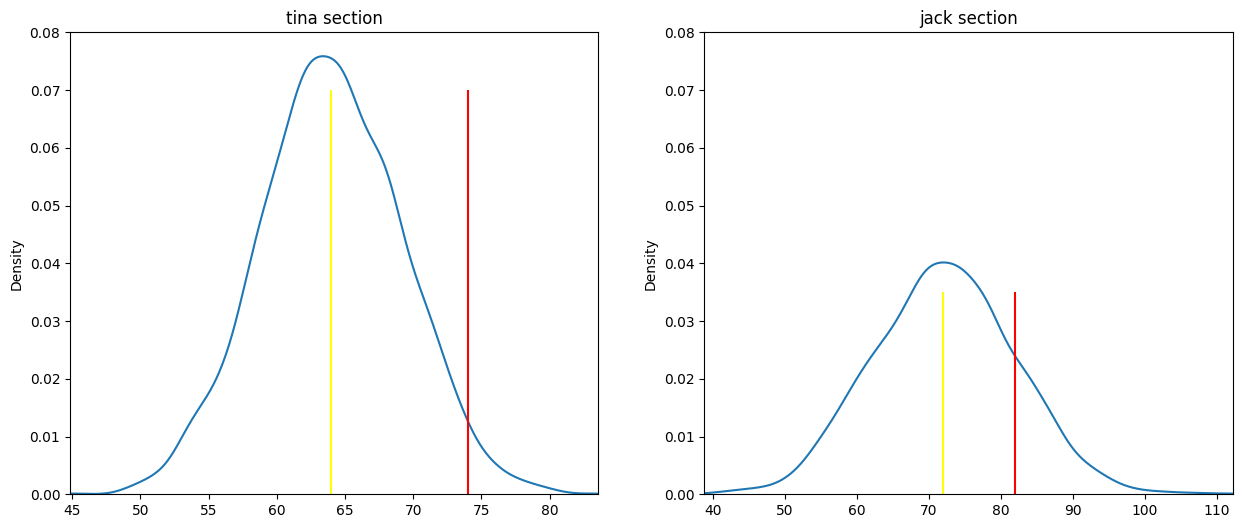

In [47]:
fig , axes = plt.subplots(ncols=2, figsize=(15,6))


axes1, axes2 = axes
sections.tina_section.plot(kind="kde", ax=axes[0] , 
             xlim=(sections.tina_section.min(), sections.tina_section.max()),
             ylim = (0, 0.08))
sections.jack_section.plot(kind="kde", ax=axes[1],
            xlim= (sections.jack_section.min(), sections.jack_section.max()),
             ylim = (0, 0.08))

axes1.set_title("tina section")
axes2.set_title("jack section")


# mean score
axes1.vlines(tina_section['mean'], 0,0.07, color='yellow' )
axes2.vlines(jack_section['mean'], 0,0.035, color='yellow')

# obtained score
axes1.vlines(tina_section['score'], 0,0.07, color='red' )
axes2.vlines(jack_section['score'], 0,0.035, color='red')

plt.show()

**Now we will plot the Standard Normal Distribution**

$${z = \frac{x-\mu}{\sigma}}$$

In [56]:
tina_diff = (tina_section["score"] - tina_section['mean']) / tina_section['std']
print("z: ",tina_diff)

z:  2.0


In [57]:
jack_diff = (jack_section["score"] - jack_section['mean']) / jack_section['std']
print("z: ",jack_diff)

z:  1.0


In [54]:
std_normal = np.random.normal(size=3000)
std_normal = pd.Series(std_normal)

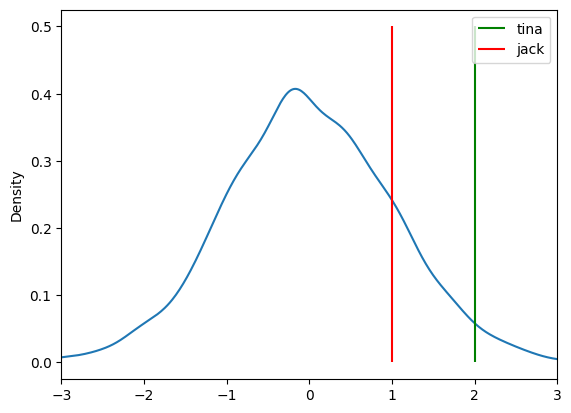

In [64]:
fig, axes = plt.subplots()

std_normal.plot(kind="kde", ax=axes, xlim=(-3,3))
axes.vlines(tina_diff, 0, 0.5, color="green", label="tina")
axes.vlines(jack_diff, 0, 0.5, color='red', label="jack")

axes.legend()
plt.show()